In [1]:
#Imports
import pandas as pd
import functions as func
import yaml
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

db_locations = func.import_yaml()

#load df
df_1 = pd.read_csv(db_locations['data_raw']['file1'])
df_2 = pd.read_csv(db_locations['data_raw']['file2'])
df_3 = pd.read_csv(db_locations['data_raw']['file3'])
df_4 = pd.read_csv(db_locations['data_raw']['file4'])


In [2]:
# Merge df_1 with df_2
df_user_comp = df_1.merge(df_2, on= "client_id").reindex(df_1.index)
df_user_comp.head(10)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
5,3727881,5.0,71.0,30.5,U,2.0,23915.60,0.0,3.0,Control
6,272934,5.0,66.0,58.5,U,2.0,27021.42,2.0,5.0,Control
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test
8,285619,30.0,369.0,67.5,M,2.0,299388.72,3.0,6.0,Control
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test


In [3]:
df_user_comp.shape

(70609, 10)

In [4]:
df_user_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70609 entries, 0 to 70608
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         70609 non-null  int64  
 1   clnt_tenure_yr    70595 non-null  float64
 2   clnt_tenure_mnth  70595 non-null  float64
 3   clnt_age          70594 non-null  float64
 4   gendr             70595 non-null  object 
 5   num_accts         70595 non-null  float64
 6   bal               70595 non-null  float64
 7   calls_6_mnth      70595 non-null  float64
 8   logons_6_mnth     70595 non-null  float64
 9   Variation         50500 non-null  object 
dtypes: float64(7), int64(1), object(2)
memory usage: 5.4+ MB


In [5]:
#Checking null

df_user_comp.isnull().any()

client_id           False
clnt_tenure_yr       True
clnt_tenure_mnth     True
clnt_age             True
gendr                True
num_accts            True
bal                  True
calls_6_mnth         True
logons_6_mnth        True
Variation            True
dtype: bool

In [6]:
# droping rows with nan on the variation Column, clients that didnt use the app for the amount of time tested
# check the missing values

df_user_comp.dropna(subset= "Variation",inplace=True)
df_user_comp.isnull().sum().sort_values(ascending=False)

clnt_age            13
clnt_tenure_yr      12
clnt_tenure_mnth    12
gendr               12
num_accts           12
bal                 12
calls_6_mnth        12
logons_6_mnth       12
client_id            0
Variation            0
dtype: int64

In [7]:
df_user_comp.sort_values(by=['bal']).tail(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
21184,987970,14.0,179.0,74.5,M,3.0,7339443.17,4.0,9.0,Control
14057,3519657,18.0,218.0,66.5,M,6.0,7741994.01,6.0,9.0,Control
31811,6762377,16.0,193.0,41.5,F,3.0,8045102.60,6.0,9.0,Test
20871,1678193,24.0,299.0,65.5,M,3.0,8137343.24,6.0,9.0,Test
2171,2291985,7.0,85.0,41.0,M,2.0,8247729.97,1.0,4.0,Control
13318,9440656,7.0,94.0,63.0,F,2.0,8292996.21,6.0,9.0,Control
23849,7070097,11.0,133.0,53.0,M,2.0,8986419.77,6.0,9.0,Test
39367,9286288,21.0,254.0,62.5,M,3.0,16320040.15,6.0,9.0,Test
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Control


In [8]:
#droping rows with columns with more that 8 columns with nan values, in this case it would corrupt the data
df_user_comp.dropna(thresh = 8, inplace= True)

In [9]:
df_user_comp.shape

(50488, 10)

In [10]:
#checking types of data 
df_user_comp.select_dtypes("number").nunique().sort_values(ascending=False)


client_id           50488
bal                 50312
clnt_tenure_mnth      469
clnt_age              158
clnt_tenure_yr         53
num_accts               7
calls_6_mnth            7
logons_6_mnth           7
dtype: int64

In [11]:
df_user_comp.select_dtypes("object").nunique().sort_values(ascending=False)

gendr        4
Variation    2
dtype: int64

In [12]:
#EDA - UNIVARIATE

In [13]:
#Checking poll of variation
# there is a slight diference that shouldnt impact the results
frequency_table = df_user_comp['Variation'].value_counts()
proportion_table = df_user_comp['Variation'].value_counts(normalize=True)

frequency_table


Variation
Test       26961
Control    23527
Name: count, dtype: int64

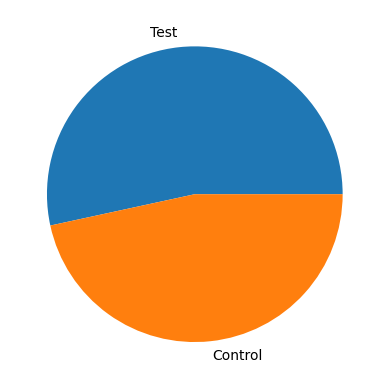

In [14]:
plt.pie(proportion_table.values, labels = proportion_table.index)
plt.show()

In [15]:

#checking frequency table for gender
# By the result could assume that the database probably is probably 50/50 on gender, with a small higher number of males
# The data is inconclusive, so we cant use it
frequency_table = df_user_comp['gendr'].value_counts()
proportion_table = df_user_comp['gendr'].value_counts(normalize=True)

frequency_table

gendr
U    17280
M    16947
F    16259
X        2
Name: count, dtype: int64

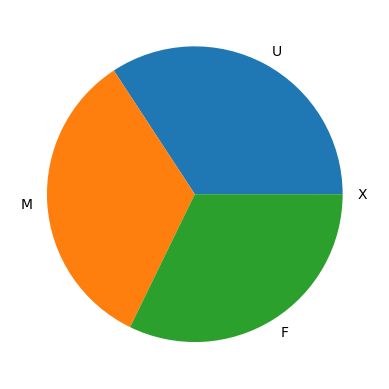

In [16]:
plt.pie(proportion_table.values, labels = proportion_table.index)
plt.show()

In [17]:
#checking numerical values

df_user_comp.select_dtypes("number").describe()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,5.048800e+04,50488.000000,50488.000000,50487.000000,50488.000000,5.048800e+04,50488.000000,50488.000000
mean,5.006173e+06,12.031730,150.415485,47.319795,2.254575,1.495147e+05,3.093289,6.131873
std,2.877417e+06,6.860282,81.944830,15.518616,0.533671,3.020364e+05,2.187991,2.175423
min,5.550000e+02,2.000000,33.000000,17.000000,1.000000,2.378944e+04,0.000000,3.000000
25%,2.515700e+06,6.000000,82.000000,33.500000,2.000000,3.987841e+04,1.000000,4.000000
50%,5.025026e+06,11.000000,136.000000,48.000000,2.000000,6.573360e+04,3.000000,6.000000
75%,7.477918e+06,16.000000,192.000000,59.500000,2.000000,1.399565e+05,5.000000,8.000000
max,9.999832e+06,55.000000,669.000000,96.000000,7.000000,1.632004e+07,6.000000,9.000000


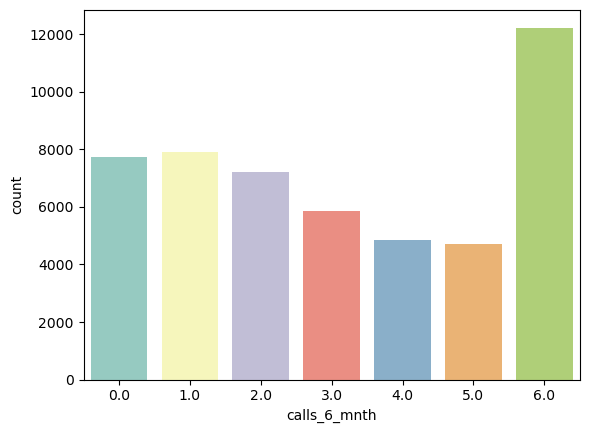

In [18]:
sns.countplot(data=df_user_comp, x='calls_6_mnth', palette="Set3", hue='calls_6_mnth', legend=False);

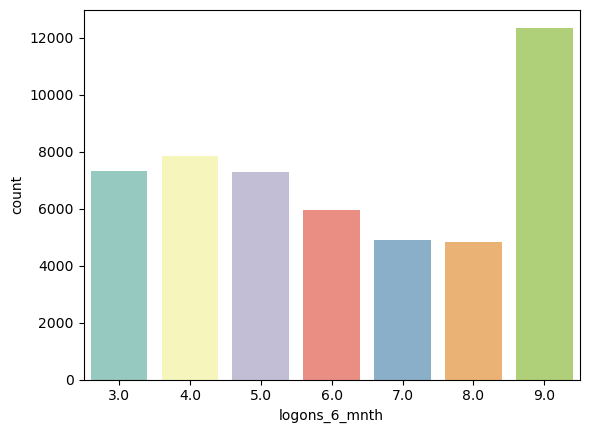

In [19]:
sns.countplot(data=df_user_comp, x='logons_6_mnth', palette="Set3", hue='logons_6_mnth', legend=False);

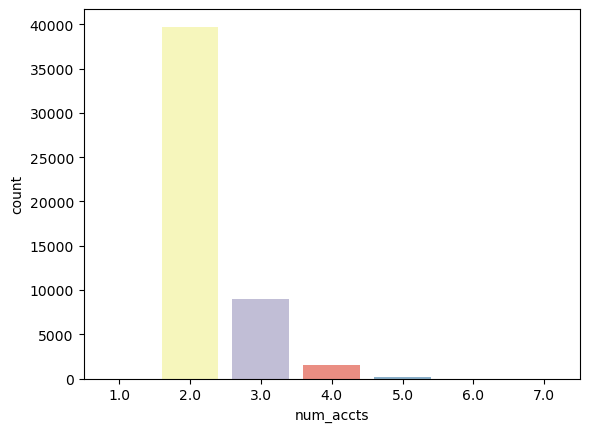

In [20]:
sns.countplot(data=df_user_comp, x='num_accts', palette="Set3", hue='num_accts', legend=False);

<Axes: xlabel='clnt_age', ylabel='Count'>

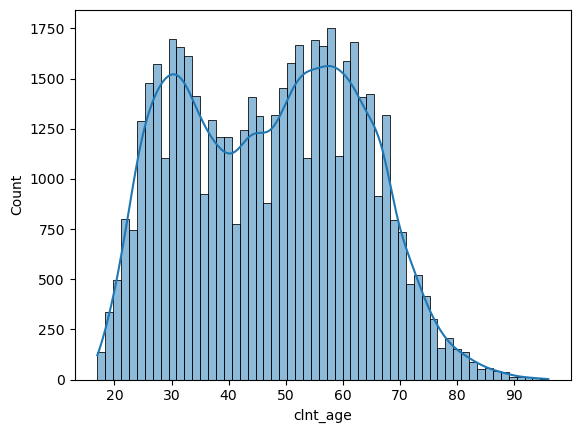

In [21]:
#Checking ages
sns.histplot(df_user_comp['clnt_age'], kde=True)


<Axes: xlabel='bal', ylabel='Count'>

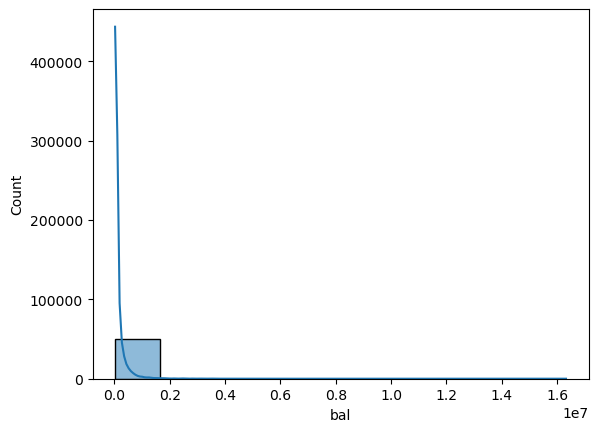

In [22]:
#Checking balance
sns.histplot(df_user_comp['bal'],bins= 10, kde=True)

<Axes: xlabel='bal'>

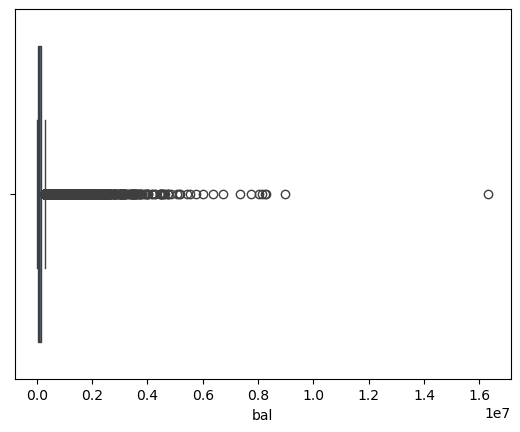

In [23]:
sns.boxplot(x = df_user_comp['bal'])

In [24]:
df_user_comp.sort_values(by=['bal']).tail(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
24711,6981798,9.0,108.0,44.5,M,3.0,4739012.27,4.0,7.0,Control
45398,8962152,11.0,141.0,57.5,M,2.0,4753214.10,6.0,9.0,Control
35108,9848978,6.0,78.0,38.5,U,3.0,4862430.04,6.0,9.0,Test
25162,8841326,32.0,391.0,60.5,F,2.0,5085307.11,6.0,9.0,Control
47090,5799151,21.0,254.0,56.0,M,3.0,5137641.69,6.0,9.0,Control
20844,6765532,28.0,336.0,56.0,M,3.0,5187970.13,5.0,8.0,Test
14425,8700059,11.0,132.0,65.0,M,2.0,5439354.90,3.0,6.0,Test
40615,2243576,11.0,136.0,62.0,M,2.0,5544842.49,6.0,9.0,Test
36379,3545814,13.0,163.0,59.0,M,3.0,5754204.68,6.0,9.0,Test
49388,5735570,37.0,451.0,73.0,M,3.0,6000386.82,6.0,9.0,Test


In [25]:
# there is a outlier that is changing the values in an huge manner. lets drop it and check the diference in data
df_user_comp.drop(df_user_comp.index[df_user_comp.client_id == 9286288], inplace= True)
df_user_comp.sort_values(by=['bal']).tail(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
47384,7991760,30.0,363.0,53.0,M,3.0,4730367.72,6.0,9.0,Control
24711,6981798,9.0,108.0,44.5,M,3.0,4739012.27,4.0,7.0,Control
45398,8962152,11.0,141.0,57.5,M,2.0,4753214.10,6.0,9.0,Control
35108,9848978,6.0,78.0,38.5,U,3.0,4862430.04,6.0,9.0,Test
25162,8841326,32.0,391.0,60.5,F,2.0,5085307.11,6.0,9.0,Control
47090,5799151,21.0,254.0,56.0,M,3.0,5137641.69,6.0,9.0,Control
20844,6765532,28.0,336.0,56.0,M,3.0,5187970.13,5.0,8.0,Test
14425,8700059,11.0,132.0,65.0,M,2.0,5439354.90,3.0,6.0,Test
40615,2243576,11.0,136.0,62.0,M,2.0,5544842.49,6.0,9.0,Test
36379,3545814,13.0,163.0,59.0,M,3.0,5754204.68,6.0,9.0,Test


In [26]:
df_user_comp.sort_values(by=['bal']).head(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
2467,5395227,7.0,93.0,32.5,U,2.0,23789.44,0.0,3.0,Test
3470,2963704,23.0,281.0,56.0,F,2.0,23789.49,0.0,3.0,Test
42269,8150905,13.0,167.0,53.0,M,2.0,23789.54,0.0,3.0,Test
49704,9962929,15.0,191.0,70.5,M,2.0,23789.61,2.0,5.0,Control
34793,3663863,15.0,189.0,52.5,M,2.0,23789.61,0.0,3.0,Control
48397,7201571,10.0,121.0,48.5,M,2.0,23789.72,4.0,7.0,Test
20785,1724386,14.0,173.0,72.0,F,2.0,23789.72,1.0,4.0,Test
34200,6389894,15.0,188.0,62.0,M,2.0,23789.86,0.0,4.0,Control
5205,2207701,9.0,109.0,61.5,M,2.0,23789.86,4.0,7.0,Control
11979,960482,13.0,161.0,31.5,F,2.0,23789.95,2.0,5.0,Test


In [27]:
df_user_comp.bal.describe()

count    5.048700e+04
mean     1.491944e+05
std      2.933400e+05
min      2.378944e+04
25%      3.987718e+04
50%      6.573287e+04
75%      1.399537e+05
max      8.986420e+06
Name: bal, dtype: float64

In [28]:
# change the values for k dolars so is easier to read an reduce the diference in numbers
df_user_comp.bal = df_user_comp.bal.apply(lambda x : round (x *0.001,0) )


In [29]:
df_user_comp.bal.describe()

count    50487.000000
mean       149.195298
std        293.337480
min         24.000000
25%         40.000000
50%         66.000000
75%        140.000000
max       8986.000000
Name: bal, dtype: float64

<Axes: xlabel='bal', ylabel='Count'>

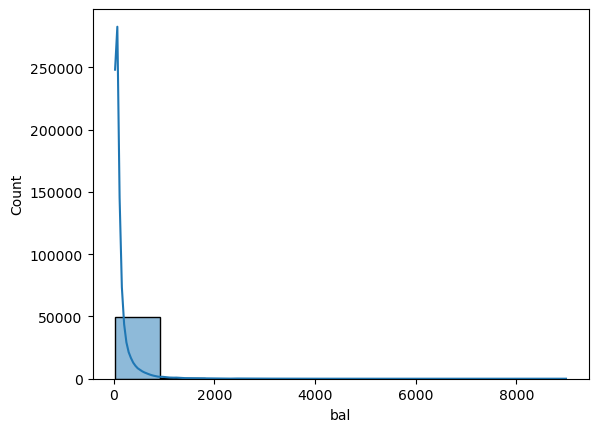

In [30]:
#checking graphs again for balance withou the outlier
sns.histplot(df_user_comp['bal'],bins= 10, kde=True)

<Axes: xlabel='bal'>

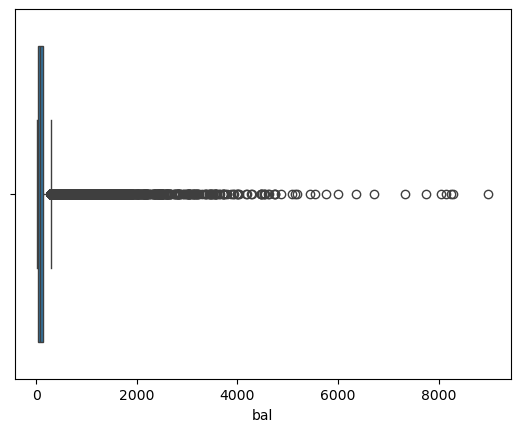

In [31]:
sns.boxplot(x = df_user_comp['bal'])

<Axes: xlabel='clnt_tenure_yr', ylabel='Count'>

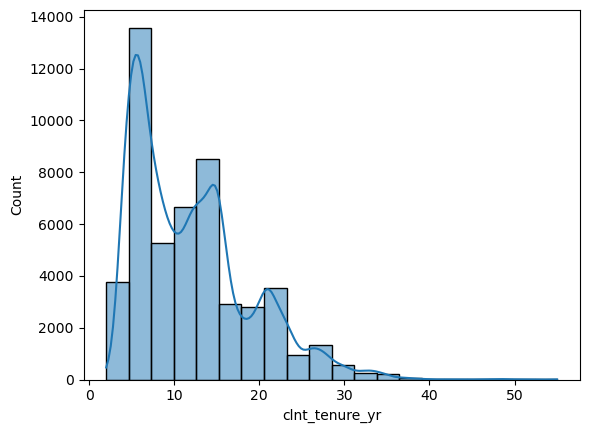

In [32]:
#Checking the time the client is a client 
sns.histplot(df_user_comp['clnt_tenure_yr'],bins= 20, kde=True)

<Axes: xlabel='clnt_tenure_yr'>

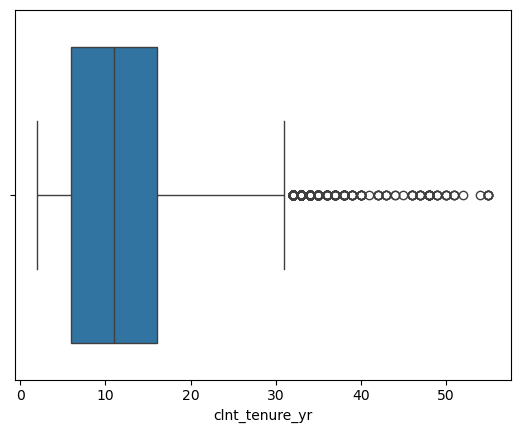

In [33]:
sns.boxplot(x = df_user_comp['clnt_tenure_yr'])

In [34]:
df_user_comp.sort_values(by=['clnt_tenure_mnth']).head(20)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
19624,2881524,2.0,33.0,33.5,U,2.0,27.0,1.0,4.0,Test
30784,6403610,2.0,33.0,34.0,U,2.0,147.0,4.0,7.0,Test
41350,7260973,2.0,33.0,56.5,M,2.0,38.0,1.0,4.0,Test
2009,4738135,2.0,33.0,57.0,U,2.0,772.0,6.0,9.0,Control
19406,9169459,2.0,33.0,60.5,U,2.0,27.0,2.0,5.0,Test
851,1954630,2.0,33.0,33.5,U,2.0,30.0,4.0,7.0,Test
44088,7520125,2.0,33.0,41.5,F,4.0,434.0,6.0,9.0,Test
48893,9572729,2.0,33.0,63.5,M,3.0,40.0,6.0,9.0,Test
49688,1585633,2.0,33.0,23.0,M,4.0,110.0,5.0,8.0,Test
24707,4929178,2.0,33.0,44.5,M,3.0,645.0,4.0,7.0,Test


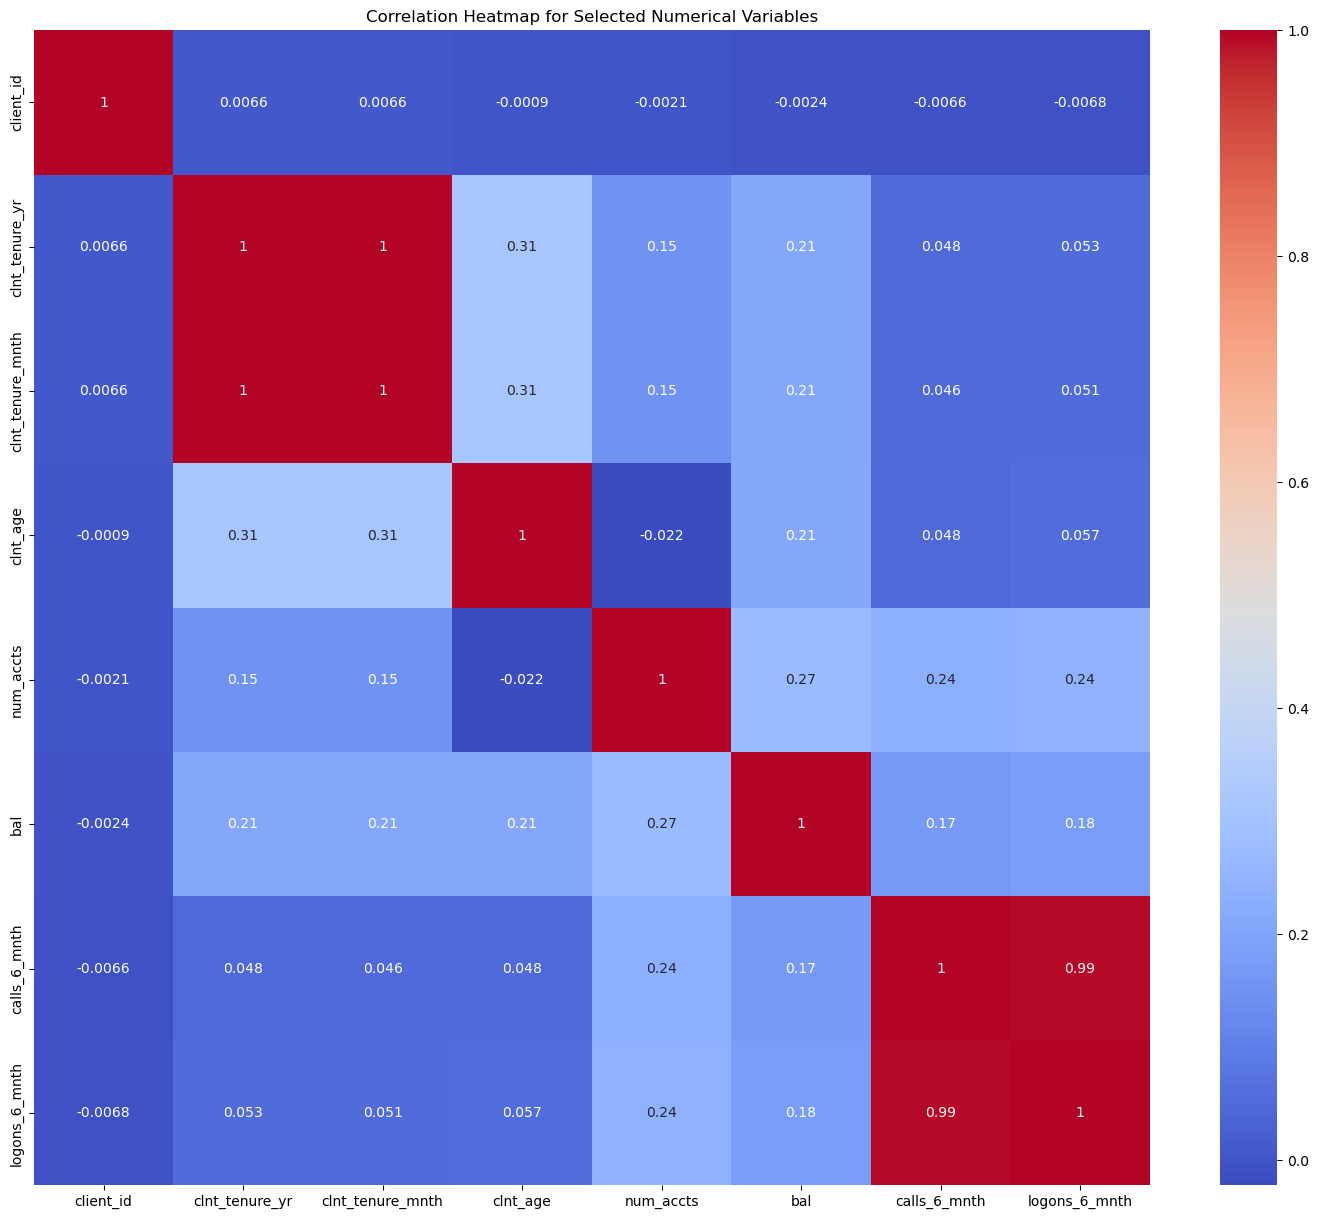

In [35]:
#EDA - Bivariate
# checking all numeric tables

correlation_matrix = df_user_comp.select_dtypes("number").corr()

# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(18, 15))

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()


In [36]:
#checking class and logons
plt.title('Scatter plot of calls_6_mnth vs ' + col)
sns.scatterplot(data=df_user_comp, x="calls_6_mnth", y="logons_6_mnth")
plt.show()

NameError: name 'col' is not defined

In [ ]:
#checking with visual aid for balance
for col in df_user_comp.select_dtypes("number").columns:
    plt.figure(figsize=(5, 5))
    plt.title('Scatter plot of balance vs ' + col)
    sns.scatterplot(data=df_user_comp, x="bal", y=col)
    plt.show()

In [ ]:
#checking if there is a relation to valitation and gender that might have an impact
crosstab_result = pd.crosstab(df_user_comp['gendr'], df_user_comp['Variation'])
crosstab_result

In [37]:
crosstab_result.plot(kind="bar", stacked=True);

NameError: name 'crosstab_result' is not defined

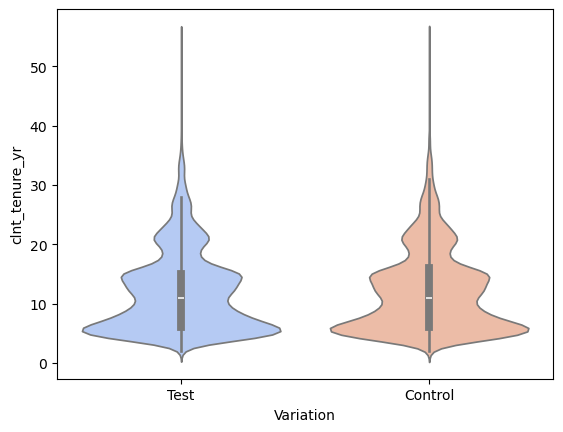

In [38]:
#cheking various relationships betwen tabels with visual aid

sns.violinplot(data=df_user_comp, x='Variation', y='clnt_tenure_yr', palette="coolwarm", hue='Variation', legend=False);

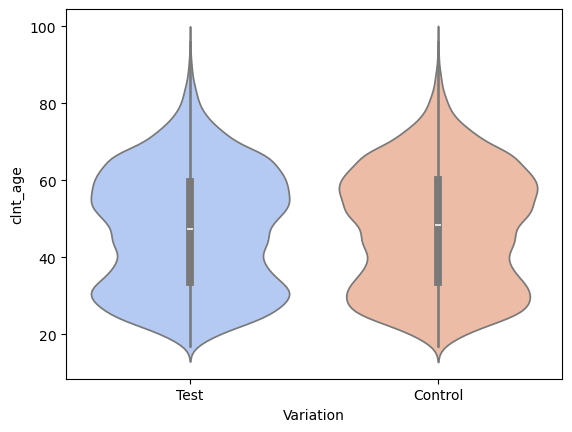

In [39]:
sns.violinplot(data=df_user_comp, x='Variation', y='clnt_age', palette="coolwarm", hue='Variation', legend=False);

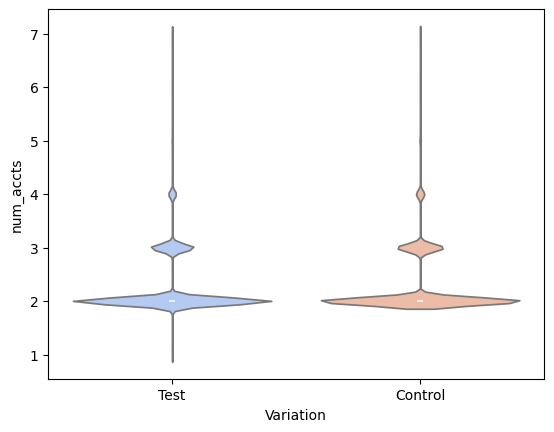

In [40]:
sns.violinplot(data=df_user_comp, x='Variation', y='num_accts', palette="coolwarm", hue='Variation', legend=False);

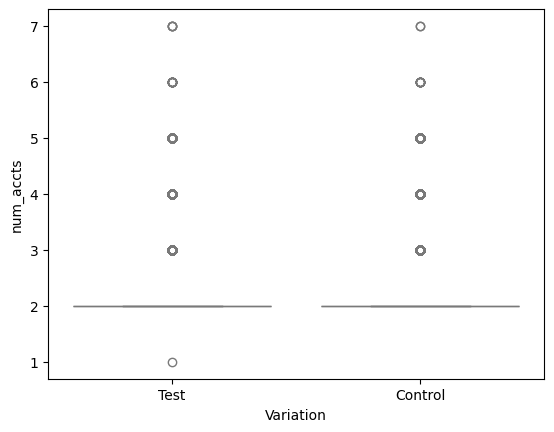

In [41]:
sns.boxplot(data=df_user_comp, x='Variation', y='num_accts', palette="coolwarm", hue='Variation', legend=False);

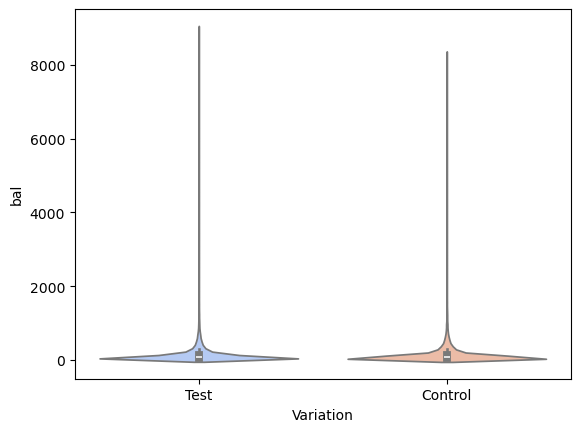

In [42]:
sns.violinplot(data=df_user_comp, x='Variation', y='bal', palette="coolwarm", hue='Variation', legend=False);

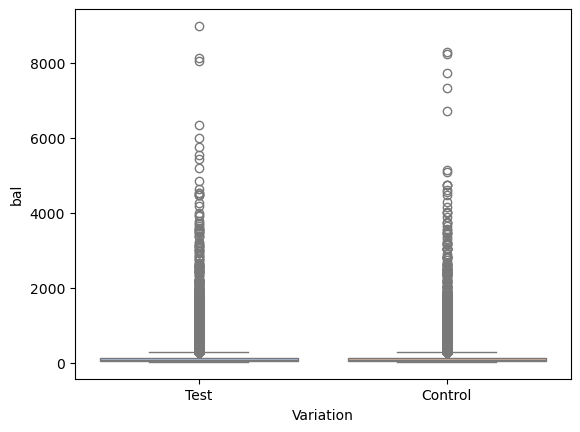

In [43]:
sns.boxplot(data=df_user_comp, x='Variation', y='bal', palette="coolwarm", hue='Variation', legend=False);

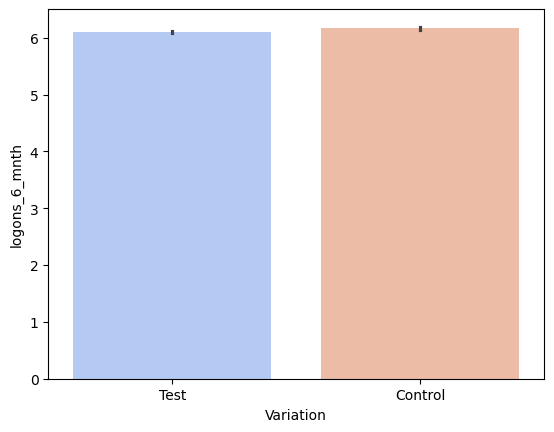

In [44]:
sns.barplot(data=df_user_comp, x='Variation', y='logons_6_mnth', palette="coolwarm", hue='Variation', legend=False);

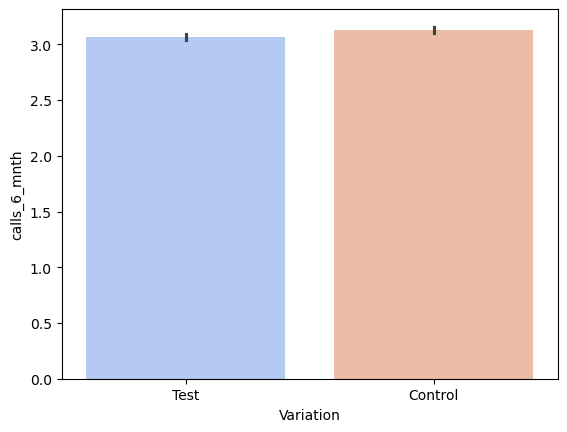

In [45]:
sns.barplot(data=df_user_comp, x='Variation', y='calls_6_mnth', palette="coolwarm", hue='Variation', legend=False);

In [46]:
#data looks clean, saving it 
df_user_comp.to_csv('../data/clean/user_data.csv',index = False)

In [47]:
# Merge df_3 with df_4

df_combined = pd.concat([df_3, df_4], ignore_index=True)
df_combined.head(20)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
5,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:17:15
6,9988021,580560515_7732621733,781255054_21935453173_531117,step_1,2017-04-17 15:17:01
7,9988021,580560515_7732621733,781255054_21935453173_531117,start,2017-04-17 15:16:22
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43


In [48]:
df_combined.isnull().any()

client_id       False
visitor_id      False
visit_id        False
process_step    False
date_time       False
dtype: bool

In [49]:
df_combined.shape

(755405, 5)

In [50]:
df_combined.client_id.value_counts().tail(50)

client_id
5430280    1
7508908    1
4165625    1
1125445    1
1455678    1
4822851    1
8833500    1
753497     1
5646224    1
9707723    1
6101609    1
1743864    1
6343415    1
6270847    1
4802709    1
8969101    1
4040765    1
3597029    1
7839492    1
2418205    1
8847795    1
4054923    1
9544510    1
7236154    1
2085264    1
9659405    1
7702166    1
8917477    1
8954204    1
4740171    1
3346321    1
9037822    1
4856038    1
5923022    1
4214485    1
8354242    1
2712440    1
19225      1
1804647    1
8364481    1
8071700    1
65768      1
5606519    1
922865     1
4430317    1
656715     1
2066750    1
1283050    1
6963245    1
674799     1
Name: count, dtype: int64

In [51]:
df_combined.client_id.value_counts().head(10)

client_id
5574879    111
2274658     90
2128341     84
5951379     81
1595223     81
1952790     80
9800867     75
7733877     72
465007      72
3545814     72
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Count'>

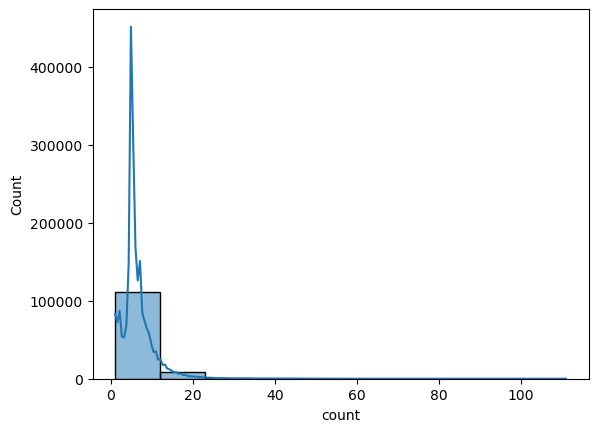

In [52]:
sns.histplot(df_combined.client_id.value_counts(),bins= 10, kde=True)

In [53]:
# Convert the ‘date_time’ column to datetime if it is not already
df_combined['date_time'] = pd.to_datetime(df_combined['date_time'])
# Sort the DataFrame by ‘visitor_id’ and ‘date_time’ to ensure the correct order of steps
df_combined = df_combined.sort_values(by=['visitor_id', 'date_time'])
# Create a new column with the previous time using the shift method
df_combined['prev_time'] = df_combined.groupby('visitor_id')['date_time'].shift(1)
# Calculate the time difference between the current and previous row
df_combined['time_diff'] = df_combined['date_time'] - df_combined['prev_time']
# Convert time_diff to seconds (or minutes, depending on your needs)
df_combined['time_diff_seconds'] = df_combined['time_diff'].dt.total_seconds()
# Check for negative time differences

In [54]:
#Checking some clients for examples to see how can we further clean the data

df_combined[df_combined["client_id"] == 5574879 ].head(30)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
744133,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,NaT,NaT,NaN
744134,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744135,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744136,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744137,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744138,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744139,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744140,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:36:37,2017-05-02 10:36:37,0 days 00:00:00,0.0
744125,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:45:26,2017-05-02 10:36:37,0 days 00:08:49,529.0
744126,5574879,722943003_3441581446,875138661_34710212496_881092,step_1,2017-05-02 10:45:26,2017-05-02 10:45:26,0 days 00:00:00,0.0


In [55]:
df_combined[df_combined["client_id"]==2274658 ].head(30)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
522056,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,NaT,NaT,NaN
522057,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522058,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522059,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522060,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522061,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522062,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522063,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522064,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522065,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0


In [56]:
df_combined[df_combined["client_id"]==8320017 ].head(30)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
12,8320017,39393514_33118319366,960651974_70596002104_312201,start,2017-04-05 13:08:06,NaT,NaT,NaN
11,8320017,39393514_33118319366,960651974_70596002104_312201,step_1,2017-04-05 13:08:24,2017-04-05 13:08:06,0 days 00:00:18,18.0
10,8320017,39393514_33118319366,960651974_70596002104_312201,step_2,2017-04-05 13:08:40,2017-04-05 13:08:24,0 days 00:00:16,16.0
9,8320017,39393514_33118319366,960651974_70596002104_312201,step_3,2017-04-05 13:09:43,2017-04-05 13:08:40,0 days 00:01:03,63.0
8,8320017,39393514_33118319366,960651974_70596002104_312201,confirm,2017-04-05 13:10:05,2017-04-05 13:09:43,0 days 00:00:22,22.0


In [57]:
df_combined[df_combined["client_id"]==4033851].head(30)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
72,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:04:00,NaT,NaT,NaN
71,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:04:56,2017-04-05 12:04:00,0 days 00:00:56,56.0
70,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:06:37,2017-04-05 12:04:56,0 days 00:01:41,101.0
69,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:08:56,2017-04-05 12:06:37,0 days 00:02:19,139.0
22,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,2017-04-05 12:08:56,0 days 00:01:29,89.0
23,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:25,2017-04-05 12:10:25,0 days 00:00:00,0.0
20,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,2017-04-05 12:10:25,0 days 00:00:01,1.0
21,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,2017-04-05 12:10:26,0 days 00:00:00,0.0
19,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,2017-04-05 12:10:26,0 days 00:13:38,818.0
18,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,2017-04-05 12:24:04,0 days 00:00:08,8.0


In [58]:
df_combined[df_combined["client_id"]==2274658 ].head(30)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
522056,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,NaT,NaT,NaN
522057,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522058,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522059,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522060,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522061,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522062,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522063,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522064,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0
522065,2274658,857376424_12378092455,518285126_8572733997_709761,start,2017-05-02 10:23:38,2017-05-02 10:23:38,0 days 00:00:00,0.0


In [59]:
df_new.head(20)

NameError: name 'df_new' is not defined

In [60]:
#testing the cleaning methods for multiple entries for the same step withou time_diff
df_new2= df_combined[df_combined["client_id"]==2274658].copy()
df_new.drop_duplicates(["visitor_id","process_step","date_time"], keep ="first")

NameError: name 'df_new' is not defined

In [61]:
#testing the cleaning methods for multiple entries for the same step but with different time_diff
df_new2 = df_combined[df_combined["client_id"]==4033851].copy()
df_new2.drop_duplicates(["visitor_id","process_step","date_time"], keep ="first")

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
72,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:04:00,NaT,NaT,NaN
71,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:04:56,2017-04-05 12:04:00,0 days 00:00:56,56.0
70,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:06:37,2017-04-05 12:04:56,0 days 00:01:41,101.0
69,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:08:56,2017-04-05 12:06:37,0 days 00:02:19,139.0
22,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:25,2017-04-05 12:08:56,0 days 00:01:29,89.0
23,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:25,2017-04-05 12:10:25,0 days 00:00:00,0.0
20,4033851,762728880_76361333336,949661017_22392791362_127391,step_2,2017-04-05 12:10:26,2017-04-05 12:10:25,0 days 00:00:01,1.0
21,4033851,762728880_76361333336,949661017_22392791362_127391,step_3,2017-04-05 12:10:26,2017-04-05 12:10:26,0 days 00:00:00,0.0
19,4033851,762728880_76361333336,949661017_22392791362_127391,start,2017-04-05 12:24:04,2017-04-05 12:10:26,0 days 00:13:38,818.0
18,4033851,762728880_76361333336,949661017_22392791362_127391,step_1,2017-04-05 12:24:12,2017-04-05 12:24:04,0 days 00:00:08,8.0


In [62]:
df_combined.drop_duplicates(["visitor_id","process_step","date_time"], keep ="first", inplace=True)

In [63]:
# didnt lose a significant data percentage
df_combined.shape

(744641, 8)

In [64]:
#96 days in a 3 moth study? numbers to big for testing?
df_combined.time_diff.describe()


count                       614405
mean     0 days 10:58:51.348940845
std      3 days 19:15:31.023768548
min                0 days 00:00:00
25%                0 days 00:00:14
50%                0 days 00:00:38
75%                0 days 00:01:34
max               96 days 22:04:00
Name: time_diff, dtype: object

In [65]:
df_combined.sort_values("time_diff_seconds", ascending= False).head(20)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
479355,576893,338035963_93943389986,773440336_4209587492_151304,confirm,2017-06-20 17:35:52,2017-03-15 19:31:52,96 days 22:04:00,8373840.0
521478,6187864,113539532_90731779729,77393632_6804608909_354572,start,2017-06-20 23:56:17,2017-03-16 21:19:57,96 days 02:36:20,8303780.0
739518,4927239,401320810_27097816804,193488858_3323435376_514597,start,2017-06-20 14:43:28,2017-03-16 18:25:24,95 days 20:18:04,8281084.0
649878,6280637,97875717_4347185181,242680516_62337210500_701882,start,2017-06-18 09:36:02,2017-03-19 05:41:54,91 days 03:54:08,7876448.0
517540,9397699,61895095_3725406022,872175167_37836173523_819984,start,2017-06-19 20:20:02,2017-03-21 10:48:19,90 days 09:31:43,7810303.0
464495,309360,304460977_88189571508,549177385_87284194236_403336,start,2017-06-14 14:30:27,2017-03-16 10:12:06,90 days 04:18:21,7791501.0
418554,9715194,774634583_74768488685,351775673_2207218989_479143,start,2017-06-14 16:46:20,2017-03-16 18:47:32,89 days 21:58:48,7768728.0
485052,1684699,755355481_61523858643,582316382_53886444885_697307,start,2017-06-16 10:21:12,2017-03-18 16:43:41,89 days 17:37:31,7753051.0
719216,4898864,228189410_33997879991,490794811_79046281931_26706,start,2017-06-16 12:16:00,2017-03-18 21:17:15,89 days 14:58:45,7743525.0
560574,8220863,983630340_19872875414,264611878_19991251050_44343,start,2017-06-19 19:21:51,2017-03-24 13:14:58,87 days 06:06:53,7538813.0


In [66]:
df_combined[df_combined["client_id"]==576893 ].head(30)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
113580,576893,338035963_93943389986,769864566_75643028524_578770,start,2017-03-15 19:30:58,NaT,NaT,NaN
113579,576893,338035963_93943389986,769864566_75643028524_578770,step_1,2017-03-15 19:31:52,2017-03-15 19:30:58,0 days 00:00:54,54.0
479355,576893,338035963_93943389986,773440336_4209587492_151304,confirm,2017-06-20 17:35:52,2017-03-15 19:31:52,96 days 22:04:00,8373840.0
479354,576893,338035963_93943389986,773440336_4209587492_151304,confirm,2017-06-20 17:36:47,2017-06-20 17:35:52,0 days 00:00:55,55.0


In [67]:
df_combined.sort_values("time_diff_seconds", ascending= False).tail(20)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds
43488,2513481,999889717_11432369821,916665891_31024789790_510155,start,2017-04-17 00:56:09,NaT,NaT,NaN
439884,2448210,999902252_80645933519,809551699_9361712052_11321,confirm,2017-06-05 09:48:19,NaT,NaT,NaN
301758,2823436,999906772_17084793191,683627468_75051326997_310973,start,2017-04-06 09:18:47,NaT,NaT,NaN
452699,60547,999910375_82007582859,93871741_50448757563_436934,start,2017-06-01 12:36:57,NaT,NaT,NaN
274385,2683357,999919504_90969113434,719327195_64782928749_98851,start,2017-04-05 11:17:39,NaT,NaT,NaN
700445,3441738,999922435_60957563720,877197741_45059726620_324300,start,2017-06-04 22:48:13,NaT,NaT,NaN
456772,164015,999926144_83267951167,474712342_25838088053_649102,start,2017-06-06 19:29:35,NaT,NaT,NaN
634844,1874691,999927712_19581489734,90745507_96168028378_29930,start,2017-06-17 19:40:58,NaT,NaT,NaN
91270,9029295,999940921_46402822673,715182789_67955183701_380680,start,2017-04-21 10:56:07,NaT,NaT,NaN
301032,4619590,999942297_56227933842,472346440_90255502664_648883,start,2017-03-19 12:16:18,NaT,NaT,NaN


<Axes: xlabel='time_diff_seconds'>

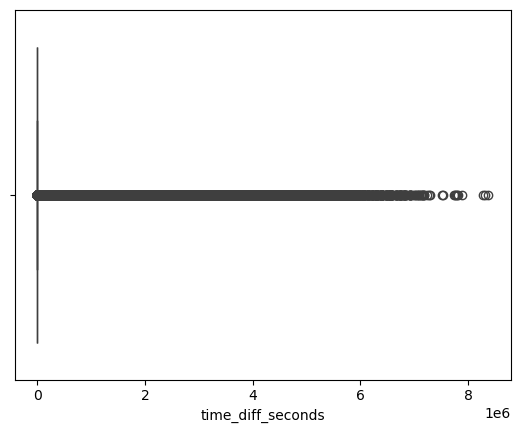

In [68]:
sns.boxplot(x = df_combined['time_diff_seconds'])

In [69]:
#Creating a column to check for errors

df_combined['error'] = 0
#reseting index
df_combined.reset_index(drop=True, inplace=True)
#adding values to the colums depenendin if there was an error or not
for i in range(1, len(df_combined)):
    if df_combined.loc[i, 'client_id'] == df_combined.loc[i-1, 'client_id']: 
        if df_combined.loc[i, 'process_step'] != 'start':  # Only check if not 'start'
            if df_combined.loc[i, 'process_step'] == 'step_1' and df_combined.loc[i-1, 'process_step'] == 'step_2':
                df_combined.loc[i, 'error'] = 1
            elif df_combined.loc[i, 'process_step'] == 'step_2' and df_combined.loc[i-1, 'process_step'] == 'step_3':
                df_combined.loc[i, 'error'] = 1
            elif df_combined.loc[i, 'process_step'] == 'step_3' and df_combined.loc[i-1, 'process_step'] == 'confirm':
                df_combined.loc[i, 'error'] = 1
    else:
        df_combined.loc[i, 'error'] = 0    

In [70]:
df_combined.to_csv('../data/clean/user_logs.csv',index = False)

In [71]:
df_combined.tail(20)

,client_id,visitor_id,visit_id,process_step,date_time,prev_time,time_diff,time_diff_seconds,error
744621,779389,999995931_60089148022,404770421_68000209065_385549,step_2,2017-04-05 12:23:03,2017-04-05 12:22:22,0 days 00:00:41,41.0,0
744622,779389,999995931_60089148022,404770421_68000209065_385549,step_3,2017-04-05 12:24:50,2017-04-05 12:23:03,0 days 00:01:47,107.0,0
744623,779389,999995931_60089148022,404770421_68000209065_385549,step_2,2017-04-05 12:25:33,2017-04-05 12:24:50,0 days 00:00:43,43.0,1
744624,779389,999995931_60089148022,404770421_68000209065_385549,step_3,2017-04-05 12:25:37,2017-04-05 12:25:33,0 days 00:00:04,4.0,0
744625,779389,999995931_60089148022,404770421_68000209065_385549,confirm,2017-04-05 12:26:07,2017-04-05 12:25:37,0 days 00:00:30,30.0,0
744626,5802950,999997533_50295491521,584953917_38889231276_551903,start,2017-04-12 08:10:01,NaT,NaT,NaN,0
744627,5802950,999997533_50295491521,584953917_38889231276_551903,step_1,2017-04-12 08:10:14,2017-04-12 08:10:01,0 days 00:00:13,13.0,0
744628,5802950,999997533_50295491521,584953917_38889231276_551903,step_2,2017-04-12 08:10:41,2017-04-12 08:10:14,0 days 00:00:27,27.0,0
744629,5802950,999997533_50295491521,584953917_38889231276_551903,step_3,2017-04-12 08:11:48,2017-04-12 08:10:41,0 days 00:01:07,67.0,0
744630,5802950,999997533_50295491521,584953917_38889231276_551903,confirm,2017-04-12 08:13:08,2017-04-12 08:11:48,0 days 00:01:20,80.0,0


In [72]:
def calculate_completion_rate_by_group(df, final_step):
    # Calculate total number of unique users by group
    total_users_by_group = df.groupby('Variation')['client_id'].nunique()
    
    # Calculate the number of users who completed the process (reached the final step) by group
    completed_by_group = df[df['process_step'] == final_step].groupby('Variation')['client_id'].nunique()
    
    # Calculate the completion rate by group
    completion_rate_by_group = (completed_by_group / total_users_by_group) * 100
    
    return completion_rate_by_group


In [73]:
def calculate_time_spent(df):
  

    # Convert the date_time column to datetime format if it isn't already
    df['date_time'] = pd.to_datetime(df['date_time'])
    
    # Sort by client_id and date_time to ensure steps are in order
    df = df.sort_values(by=['client_id', 'date_time'])
    
    # Calculate the time difference between each step for each user
    df['time_diff'] = df.groupby('client_id')['date_time'].diff()
    
    # Calculate the average time spent on each step overall
    avg_time_spent = df.groupby('process_step')['time_diff'].mean()
    
    # Calculate the average time spent on each step by group (control/test)
    avg_time_spent_by_group = df.groupby(['Variation', 'process_step'])['time_diff'].mean().reset_index()
    
    return avg_time_spent, avg_time_spent_by_group


In [74]:
print(df_combined.columns)


Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'prev_time', 'time_diff', 'time_diff_seconds', 'error'],
      dtype='object')


In [75]:
# Assuming df_2 contains separate 'client_id' and 'Variation' columns
df_experiment_clients_split = df_2[['client_id', 'Variation']]

# Now merge df_combined with df_experiment_clients_split based on 'client_id'
df_combined = pd.merge(df_combined, df_experiment_clients_split, on='client_id', how='left')


In [206]:
# Calculate completion rate by group
completion_rates = calculate_completion_rate_by_group(df_combined, 'confirm')
print(completion_rates)

# Calculate time spent on each step
avg_time_spent, avg_time_spent_by_group = calculate_time_spent(df_combined)
print("Average Time Spent Overall:")
print(avg_time_spent)

print("\nAverage Time Spent by Group:")
print(avg_time_spent_by_group)


Variation
Control    65.587285
Test       69.293236
Name: client_id, dtype: float64
Average Time Spent Overall:
process_step
confirm   0 days 17:49:26.923383182
start     2 days 21:02:51.206842562
step_1    0 days 00:23:30.749279823
step_2    0 days 00:01:04.451619951
step_3    0 days 00:09:48.570988845
Name: time_diff, dtype: timedelta64[ns]

Average Time Spent by Group:
  Variation process_step                 time_diff
0   Control      confirm 0 days 18:32:02.877095617
1   Control        start 4 days 16:16:54.531207413
2   Control       step_1 0 days 00:30:46.523360043
3   Control       step_2 0 days 00:00:39.514806908
4   Control       step_3 0 days 00:09:42.693882091
5      Test      confirm 1 days 05:08:54.903365649
6      Test        start 3 days 04:43:56.158817274
7      Test       step_1 0 days 00:22:23.347098011
8      Test       step_2 0 days 00:01:51.536464571
9      Test       step_3 0 days 00:12:22.739449755


In [76]:
def calculate_error_rate(df):

    # Sort by client_id and date_time to ensure steps are in order
    df = df.sort_values(by=['client_id', 'date_time'])
    
    # Convert process_step to numeric if it isn't already (assuming steps are ordered numerically)
    df['process_step'] = pd.to_numeric(df['process_step'], errors='coerce')
    
    # Calculate the difference between the current step and the previous step for each user
    df['step_diff'] = df.groupby('client_id')['process_step'].diff()
    
    # Identify errors: step_diff < 0 indicates a backward movement (error)
    df['error'] = df['step_diff'] < 0
    
    # Calculate the error rate for each group (Test and Control)
    error_rate_by_group = df.groupby('Variation')['error'].mean() * 100
    
    return error_rate_by_group

# Example usage:
error_rates = calculate_error_rate(df_combined)
print("Error Rates by Group (Test and Control):")
print(error_rates)


Error Rates by Group (Test and Control):
Variation
Control    0.0
Test       0.0
Name: error, dtype: float64


In [77]:
print(df_combined['process_step'].unique())


['start' 'step_1' 'step_2' 'step_3' 'confirm']


In [78]:
df_combined = df_combined.sort_values(by=['client_id', 'date_time'])

In [79]:
print(df_combined.isnull().sum())


client_id                 0
visitor_id                0
visit_id                  0
process_step              0
date_time                 0
prev_time            130236
time_diff            130236
time_diff_seconds    130236
error                     0
Variation            427406
dtype: int64


In [80]:
df_combined['process_step'] = pd.to_numeric(df_combined['process_step'], errors='coerce')


In [81]:
df_combined['step_diff'] = df_combined.groupby('client_id')['process_step'].diff()
print(df_combined[['client_id', 'process_step', 'step_diff']].head(20))  # See the first 20 rows


        client_id  process_step  step_diff
83824         169           NaN        NaN
83825         169           NaN        NaN
83826         169           NaN        NaN
83827         169           NaN        NaN
83828         169           NaN        NaN
454518        336           NaN        NaN
454519        336           NaN        NaN
311003        546           NaN        NaN
311004        546           NaN        NaN
311005        546           NaN        NaN
311006        546           NaN        NaN
311007        546           NaN        NaN
252206        555           NaN        NaN
252207        555           NaN        NaN
252208        555           NaN        NaN
252209        555           NaN        NaN
252210        555           NaN        NaN
471062        647           NaN        NaN
471063        647           NaN        NaN
471064        647           NaN        NaN


In [82]:
from statsmodels.stats.proportion import proportions_ztest

def completion_rate_hypothesis_test(df, final_step):
    
    # Count completed users in the Control group
    completed_control = df[(df['process_step'] == final_step) & (df['Variation'] == 'Control')]['client_id'].nunique()
    total_control = df[df['Variation'] == 'Control']['client_id'].nunique()
    
    # Count completed users in the Test group
    completed_test = df[(df['process_step'] == final_step) & (df['Variation'] == 'Test')]['client_id'].nunique()
    total_test = df[df['Variation'] == 'Test']['client_id'].nunique()
    
    # Successes (completions) and total users in both groups
    successes = [completed_control, completed_test]
    totals = [total_control, total_test]
    
    # Print to debug and check for zero values
    print(f"Successes (Control, Test): {successes}")
    print(f"Totals (Control, Test): {totals}")
    
    # Check for zero totals or completions
    if 0 in totals or 0 in successes:
        print("Error: One of the groups has no users or no completions.")
        return None, None
    
    # Perform z-test for two proportions
    z_stat, p_value = proportions_ztest(successes, totals, alternative='larger')
    
    return z_stat, p_value

# Example usage:
z_stat, p_value = completion_rate_hypothesis_test(df_combined, 'confirm')
print(f"z-Statistic: {z_stat}, p-Value: {p_value}")


Successes (Control, Test): [0, 0]
Totals (Control, Test): [23532, 26968]
Error: One of the groups has no users or no completions.
z-Statistic: None, p-Value: None


In [248]:
# Check if 'Variation' column exists
if 'Variation' in df_combined.columns:
    # Check the size of the Control and Test groups
    group_sizes = df_combined['Variation'].value_counts()
    print("Group sizes (Control vs Test):")
    print(group_sizes)

    # Check if age and tenure columns exist
    if 'clnt_age' in df_combined.columns and 'clnt_tenure_yr' in df_combined.columns:
        # Ensure randomness by checking user characteristics (age, tenure) in both groups
        user_characteristics = df_combined.groupby('Variation').agg({
            'client_id': 'nunique', 
            'clnt_age': 'mean', 
            'clnt_tenure_yr': 'mean'
        })
        print("\nUser Characteristics by Group:")
        print(user_characteristics)
    else:
        print("Columns 'clnt_age' and 'clnt_tenure_yr' are missing. Please verify the data.")
else:
    print("Column 'Variation' is missing. Please verify the data.")


Group sizes (Control vs Test):
Variation
Test       176699
Control    140536
Name: count, dtype: int64
Columns 'clnt_age' and 'clnt_tenure_yr' are missing. Please verify the data.


In [252]:
# Check if Variation_x, Variation_y, and Variation are identical
print(df_combined[['Variation_x', 'Variation_y', 'Variation']].drop_duplicates())


       Variation_x Variation_y Variation
83824          NaN         NaN       NaN
252206        Test        Test      Test
268014     Control     Control   Control


In [254]:
# Keep only the relevant Variation column (adjust based on the previous check)
df_combined = df_combined.drop(columns=['Variation_x', 'Variation_y'])


In [258]:
# Option 1: Remove rows where Variation is NaN
df_combined = df_combined.dropna(subset=['Variation'])

# OR

# Option 2: Replace NaN in Variation with 'Unknown'
df_combined['Variation'].fillna('Unknown', inplace=True)


/var/folders/bh/yy0x6bgj269082bhpmw5htbw0000gn/T/ipykernel_52619/4247203388.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_combined['Variation'].fillna('Unknown', inplace=True)
/var/folders/bh/yy0x6bgj269082bhpmw5htbw0000gn/T/ipykernel_52619/4247203388.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Variation'].fillna(